In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_idx = i + n_steps
        
        if end_idx > len(sequence)-1:
            break
        seq_x , seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [3]:
seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [4]:
n_steps = 3

In [5]:
X, y = split_sequence(seq, n_steps)

# MLP Model

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [7]:
inputs = Input(shape = (n_steps))
d = Dense(100, activation='relu')(inputs)
d = Dense(1)(d)
model = Model(inputs, d)

In [8]:
model.summary()
model.compile(loss='mse', optimizer='adam')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist = model.fit(X, y, epochs = 2000, verbose =0)

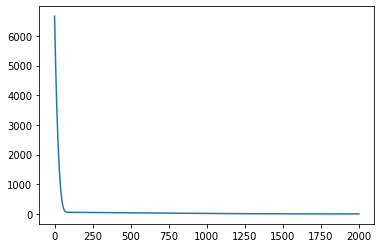

In [10]:
plt.plot(hist.history['loss'])
plt.show()

In [11]:
x_input = np.array([70, 80, 90])
x_input = x_input.reshape((1, n_steps))
yhat = model.predict(x_input, verbose=0)

In [12]:
yhat

array([[100.80939]], dtype=float32)

# Multivariate MLP Models

In [13]:
in_seq1 = np.arange(10, 100, 10)
in_seq2 = np.arange(15, 100, 10)
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [14]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [15]:
dataset = np.hstack((in_seq1, in_seq2, out_seq))

In [16]:
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [17]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_idx = i + n_steps
        
        if end_idx > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_idx, :-1], sequences[end_idx-1, -1]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [18]:
X, y = split_sequences(dataset, 3)

In [19]:
print(X.shape, y.shape)

(7, 3, 2) (7,)


In [20]:
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

In [21]:
X

array([[10, 15, 20, 25, 30, 35],
       [20, 25, 30, 35, 40, 45],
       [30, 35, 40, 45, 50, 55],
       [40, 45, 50, 55, 60, 65],
       [50, 55, 60, 65, 70, 75],
       [60, 65, 70, 75, 80, 85],
       [70, 75, 80, 85, 90, 95]])

In [22]:
inputs = Input(shape=n_input)
d = Dense(100, activation='relu')(inputs)
d = Dense(1)(d)
model = Model(inputs, d)

In [23]:
model.summary()
model.compile(loss='mse', optimizer='adam')

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist = model.fit(X, y, epochs=2000, verbose=0)

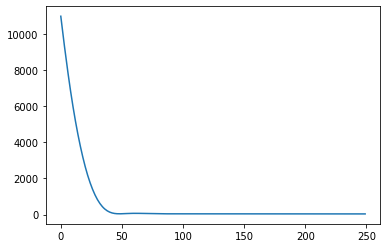

In [25]:
plt.plot(hist.history['loss'][:250])

In [26]:
x_input = np.array([[80, 85], [90,95], [100,105]])
x_input = x_input.reshape((1, n_input))

In [27]:
x_input

array([[ 80,  85,  90,  95, 100, 105]])

In [28]:
x_input2 = np.array([[100,105,110,115,120,125]])

In [29]:
x_input2

array([[100, 105, 110, 115, 120, 125]])

In [30]:
yhat = model.predict(x_input, verbose=0)

In [31]:
yhat

array([[205.36955]], dtype=float32)

In [32]:
for i in range(len(X)):
    print(X[i], y[i])

[10 15 20 25 30 35] 65
[20 25 30 35 40 45] 85
[30 35 40 45 50 55] 105
[40 45 50 55 60 65] 125
[50 55 60 65 70 75] 145
[60 65 70 75 80 85] 165
[70 75 80 85 90 95] 185


In [33]:
pred = model.predict(x_input2, verbose=0)
print(pred)

[[245.59251]]


## Multi-headed MLP Model

In [34]:
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model

In [35]:
X, y = split_sequences(dataset, n_steps)

In [36]:
X1 = X[:, :, 0]
X2 = X[:, :, 1]

In [37]:
visible1 = Input(shape=(n_steps, ))
visible2 = Input(shape=(n_steps, ))

dense1 = Dense(100, activation='relu')(visible1)
dense2 = Dense(100, activation='relu')(visible2)
merge = concatenate([dense1, dense2])
output = Dense(1)(merge)

In [38]:
model = Model((visible1, visible2), output)
model.compile(optimizer='adam', loss='mse')

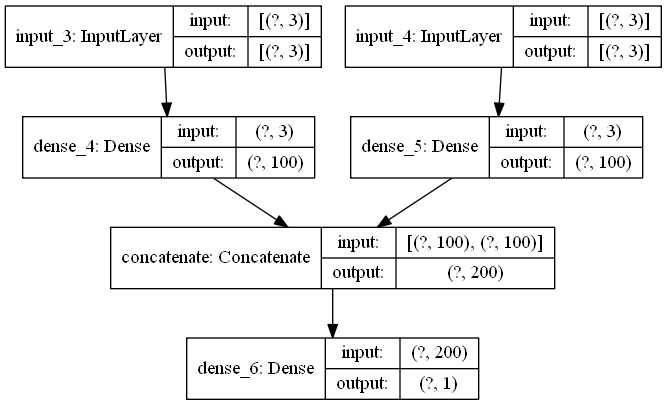

In [39]:
plot_model(model, show_shapes=True)

In [40]:
model.fit([X1, X2], y, epochs=2000, verbose=0)

In [41]:
x_input = np.array([[80, 85], [90,95], [100,105]])

In [42]:
x1 = x_input[:, 0].reshape((1, n_steps))
x2 = x_input[:, 1].reshape((1, n_steps))
yhat = model.predict([x1, x2], verbose=0)

In [43]:
print(yhat)

[[205.65758]]


# Multiple Parallel Series

In [81]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_idx = i + n_steps_in
        out_end_idx = end_idx + n_steps_out
        
        if out_end_idx > len(sequences):
            break
            
        seq_x, seq_y = sequences[i:end_idx, :], sequences[end_idx:out_end_idx, :]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [82]:
in_seq1 = np.arange(10,100,10)
in_seq2 = np.arange(15,100,10)
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [83]:
print(in_seq1)
print(in_seq2)
print(out_seq)

[10 20 30 40 50 60 70 80 90]
[15 25 35 45 55 65 75 85 95]
[ 25  45  65  85 105 125 145 165 185]


In [84]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [85]:
dataset = np.hstack((in_seq1, in_seq2, out_seq))

In [86]:
n_steps_in, n_steps_out = 3, 2

In [87]:
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

In [90]:
print(X.shape, y.shape)

(5, 3, 3) (5, 2, 3)


In [92]:
for i in range(len(X)):
    print(X[i], y[i])

[[10 15 25]
 [20 25 45]
 [30 35 65]] [[ 40  45  85]
 [ 50  55 105]]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [[ 50  55 105]
 [ 60  65 125]]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [[ 60  65 125]
 [ 70  75 145]]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [[ 70  75 145]
 [ 80  85 165]]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [[ 80  85 165]
 [ 90  95 185]]


MLP model is only capable of taking vector inputs and outputs

In [93]:
n_input = X.shape[1] * X.shape[2]
X = X.reshape((X.shape[0], n_input))

n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

In [97]:
print(X)
print(y)

[[ 10  15  25  20  25  45  30  35  65]
 [ 20  25  45  30  35  65  40  45  85]
 [ 30  35  65  40  45  85  50  55 105]
 [ 40  45  85  50  55 105  60  65 125]
 [ 50  55 105  60  65 125  70  75 145]]
[[ 40  45  85  50  55 105]
 [ 50  55 105  60  65 125]
 [ 60  65 125  70  75 145]
 [ 70  75 145  80  85 165]
 [ 80  85 165  90  95 185]]


In [98]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [106]:
inputs = Input(shape=(n_input))
x = Dense(100, activation='relu')(inputs)
x = Dense(n_output)(x)

In [107]:
model = Model(inputs, x)

In [108]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 606       
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(loss='mse', optimizer='adam')

In [111]:
hist = model.fit(X, y, epochs=2000, verbose=0)

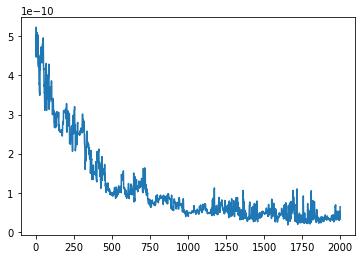

In [112]:
plt.plot(hist.history['loss'])

In [114]:
x_input = np.array([[60, 65, 125], [70,75,145], [80,85,165]])

In [116]:
x_input = x_input.reshape((1, -1))

In [118]:
yhat = model.predict(x_input, verbose=0)

In [119]:
yhat

array([[ 90.00001,  94.99999, 185.00002, 100.00001, 104.99999, 205.00003]],
      dtype=float32)